# Example notebook for extension to Dark Scattering

In [1]:
from classy import Class

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# An LCDM case

cosmo_lcdm = Class()
cosmo_lcdm.set({'output':'tCl mPk dTk vTk','P_k_max_1/Mpc':50,
               'h':0.7,'N_ur':2.0308,'N_ncdm':1,'m_ncdm':0.0,
               'omega_b':0.022,'omega_cdm':0.104976,'gauge':'Newtonian'})

cosmo_lcdm.compute()

In [3]:
# Now various cases with constant w to test ppf

models = ['PPF1','PPF2','FLD1','FLD2']
w0 = {'PPF1':-0.9,'PPF2':-1.1,'FLD1':-0.9,'FLD2':-1.1}
useppf = {'PPF1':'yes','PPF2':'yes','FLD1':'no','FLD2':'no'}

cosmo = {}

for M in models:
    cosmo[M] = Class()
    cosmo[M].set({'output':'tCl mPk dTk vTk','P_k_max_1/Mpc':50,
               'h':0.7,
               'omega_b':0.022,'omega_cdm':0.104976,
               'N_ur':2.0308,'N_ncdm':1,'m_ncdm':0.0,
               'cs2_fld':1.,
               'w0_fld':w0[M],'wa_fld':0.0,'xi_ds':0.0,'Omega_Lambda':0.,'gauge':'Newtonian',
               'use_ppf':useppf[M],'dark_scattering':'yes'})

    cosmo[M].compute()

In [11]:
# Now, the dark scattering case for the same w as above

cosmo_ds = {}

xi_ds=50.

for M in models:
    cosmo_ds[M] = Class()
    cosmo_ds[M].set({'output':'tCl mPk dTk vTk','P_k_max_1/Mpc':50,
               'h':0.7,
               'omega_b':0.022,'omega_cdm':0.104976,
               'cs2_fld':1.,
               'w0_fld':w0[M],'wa_fld':0.0,'xi_ds':xi_ds,'Omega_Lambda':0.,'gauge':'Newtonian',
               'use_ppf':useppf[M],'dark_scattering':'yes'})    

    cosmo_ds[M].compute()

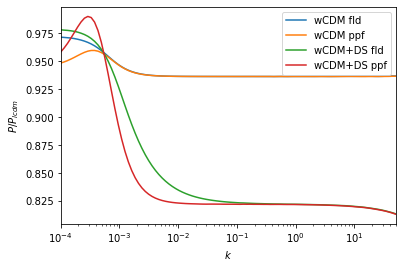

In [12]:
# Comparison of matter power spectra also between ppf and non-ppf

k_arr=np.geomspace(1e-4,50,100)
h=0.7

Pk_fld = np.array([cosmo['FLD1'].pk(k, 0.0)*h*h*h for k in k_arr])
Pk_ppf = np.array([cosmo['PPF1'].pk(k, 0.0)*h*h*h for k in k_arr])

Pk_fld_ds = np.array([cosmo_ds['FLD1'].pk(k, 0.0)*h*h*h for k in k_arr])
Pk_ppf_ds = np.array([cosmo_ds['PPF1'].pk(k, 0.0)*h*h*h for k in k_arr])

Pk_lcdm = np.array([cosmo_lcdm.pk(k, 0.0)*h*h*h for k in k_arr])

plt.semilogx(k_arr,Pk_fld/Pk_lcdm,label='wCDM fld')
plt.semilogx(k_arr,Pk_ppf/Pk_lcdm,label='wCDM ppf')

plt.semilogx(k_arr,Pk_fld_ds/Pk_lcdm,label='wCDM+DS fld')
plt.semilogx(k_arr,Pk_ppf_ds/Pk_lcdm,label='wCDM+DS ppf')
plt.xlim([1e-4,50])
#plt.ylim([6e-11,1e-9])
plt.xlabel(r'$k$')
plt.ylabel(r'$P/P_{lcdm}$')
plt.legend()